In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing numpy and pandas
import pandas as pd
import numpy as np

#importing visualization librabries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing sklearn libraies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

## 1. Reading and understanding data

In [3]:
#import datasets
lead_score_df=pd.read_csv("Leads.csv")
lead_score_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#shape of dataframe
lead_score_df.shape

(9240, 37)

In [5]:
lead_score_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2. DataCleaning

In [7]:
# checking for duplicate values.
lead_score_df.loc[lead_score_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### It has no duplicate values

In [8]:
lead_score_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### As we can see many columns has select value which means the applicant has not selected any option which is a null value we can replace select with nan

In [9]:
# Converting select value to null values
lead_score_df=lead_score_df.replace('Select',np.nan)

In [10]:
#checking for null values
lead_score_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# converting null count to percentage
round((lead_score_df.isnull().sum().sort_values(ascending=False)/len(lead_score_df.index)),2)*100

How did you hear about X Education               78.0
Lead Profile                                     74.0
Lead Quality                                     52.0
Asymmetrique Profile Score                       46.0
Asymmetrique Activity Score                      46.0
Asymmetrique Activity Index                      46.0
Asymmetrique Profile Index                       46.0
City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Last Activity                                     1.0
Lead Source                                       0.0
Receive More Updates About Our Courses            0.0
I agree to pay the amount th

### We can drop missing value columns which are greater than 40 but not lead Quality.

In [12]:
lead_score_df=lead_score_df.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index',
                                          'Asymmetrique Activity Score','Asymmetrique Profile Score',
                                         'How did you hear about X Education','Lead Profile'])

In [13]:
round((lead_score_df.isnull().sum().sort_values(ascending=False)/len(lead_score_df.index)),2)*100

Lead Quality                                     52.0
City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Last Activity                                     1.0
Lead Source                                       0.0
Receive More Updates About Our Courses            0.0
Prospect ID                                       0.0
Digital Advertisement                             0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Through Recommendations     

### Handling the remaining null values column wise

In [14]:
# function for plotting 
def bar_plot(col):
    plt.style.use('classic')
    sns.despine
    value_count=(lead_score_df[col].value_counts(normalize=True)*100)
    value_count.plot.bar(color=sns.color_palette('Set3'))
    plt.xlabel(col)
    plt.ylabel('percentage')
    plt.show()


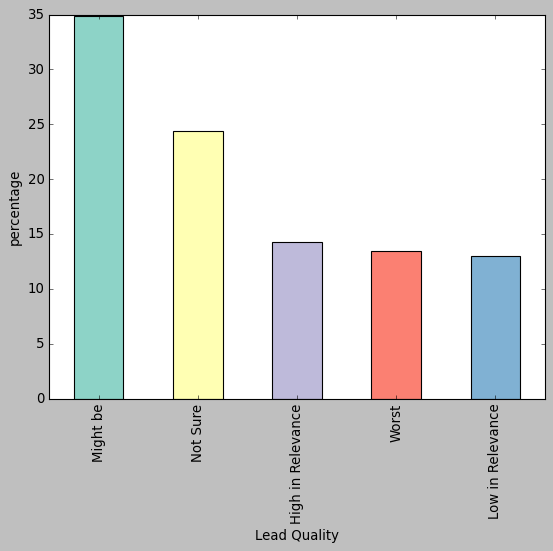

In [15]:
# Lead Quality
bar_plot('Lead Quality')

#### We cant impute null values in lead quality with 'not sure' because we can assume applicants dont know or weren't sure what to fill 

In [16]:
lead_score_df['Lead Quality']=lead_score_df['Lead Quality'].replace(np.nan,'Not Sure')

In [17]:
# Checking for null values again
lead_score_df['Lead Quality'].isnull().sum()

0

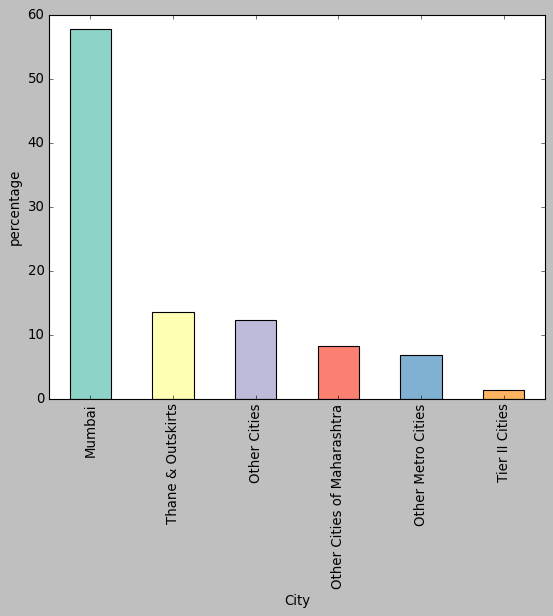

In [18]:
# City
bar_plot('City')

####  As we can see most of the applicants are from mumbai we can impute the null values with mumbai or mode

In [19]:
lead_score_df['City']=lead_score_df['City'].replace(np.nan,lead_score_df['City'].mode()[0])

In [20]:
# Checking for null values again
lead_score_df['City'].isnull().sum()

0

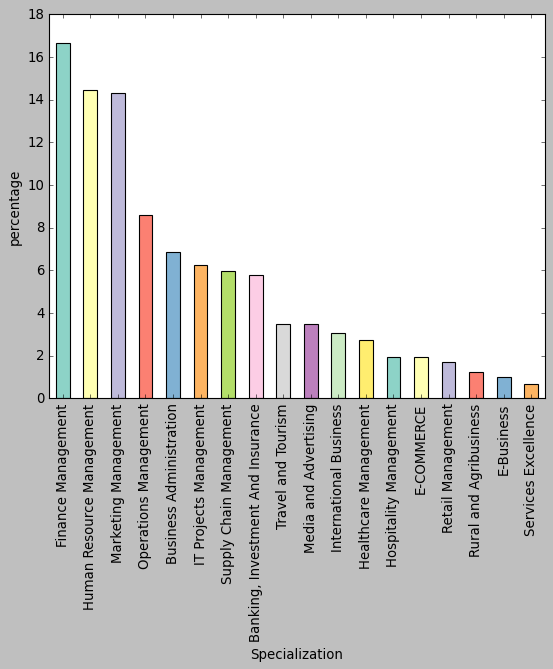

In [21]:
# Specialization
bar_plot('Specialization')

#### We dont know what the applicant's specialization is because the applicant can be student or doent have any specialization also. so we can impute null value with new value others

In [22]:
lead_score_df['Specialization']=lead_score_df['Specialization'].replace(np.nan,'Others')

In [23]:
lead_score_df['Specialization'].isnull().sum()

0

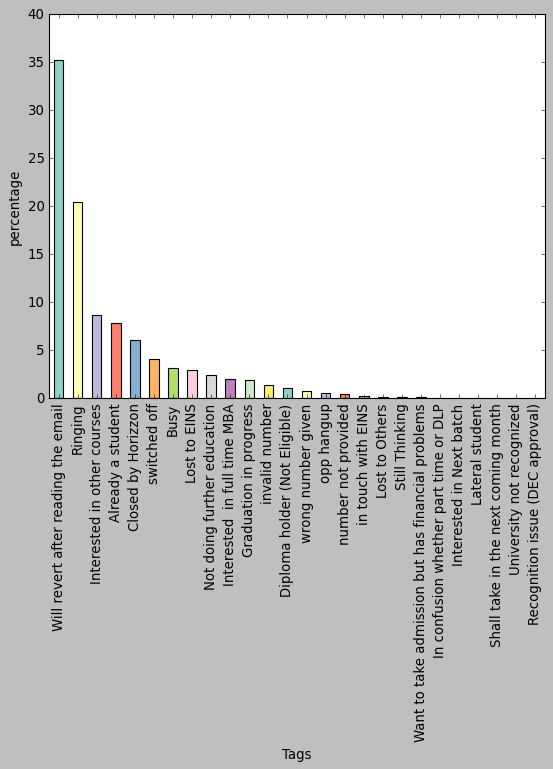

In [24]:
# Tags
bar_plot('Tags')

#### We can impute missing values with mode i.e,'Will revert reading the email'

In [25]:
lead_score_df['Tags']=lead_score_df['Tags'].replace(np.nan,lead_score_df['Tags'].mode()[0])

In [26]:
lead_score_df['Tags'].mode()[0]

'Will revert after reading the email'

In [27]:
# Checking for null values again
lead_score_df['Tags'].isnull().sum()

0

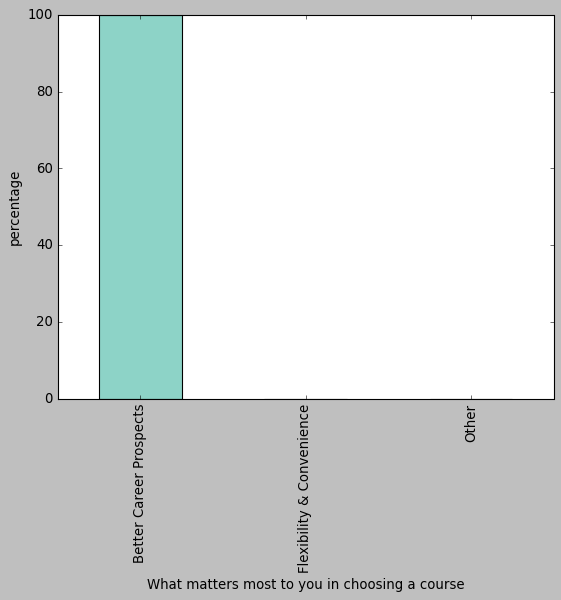

In [28]:
# What matters most to you in choosing a course
bar_plot('What matters most to you in choosing a course')

In [29]:
lead_score_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### This data looks highly skewed because the Better carrer prospects appeared 6528 times and other two appeared once or twice we can go ahead and drop this column

In [30]:
lead_score_df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

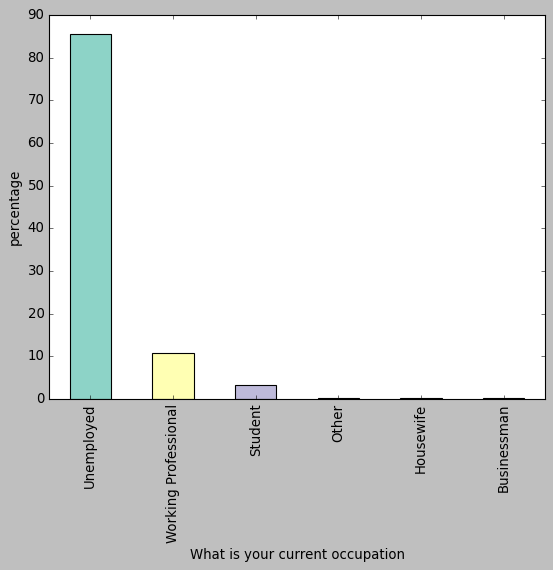

In [31]:
# What is your current occupation
bar_plot('What is your current occupation')

### We can impute the most frequent value or can drop the null rows as it wont affect much

In [32]:
lead_score_df['What is your current occupation']=lead_score_df['What is your current occupation'].replace(np.nan,lead_score_df['What is your current occupation'].mode()[0])

In [33]:
lead_score_df['What is your current occupation'].isnull().sum()

0

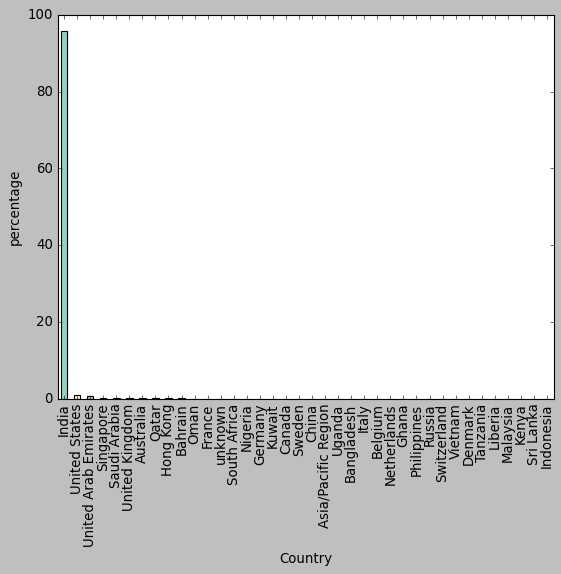

In [34]:
# Country
bar_plot('Country')

In [35]:
#Seems like most of the applicants are from India and the column seems to be insignificant in our analysis and can be dropped
lead_score_df.drop(['Country'],axis=1,inplace=True)

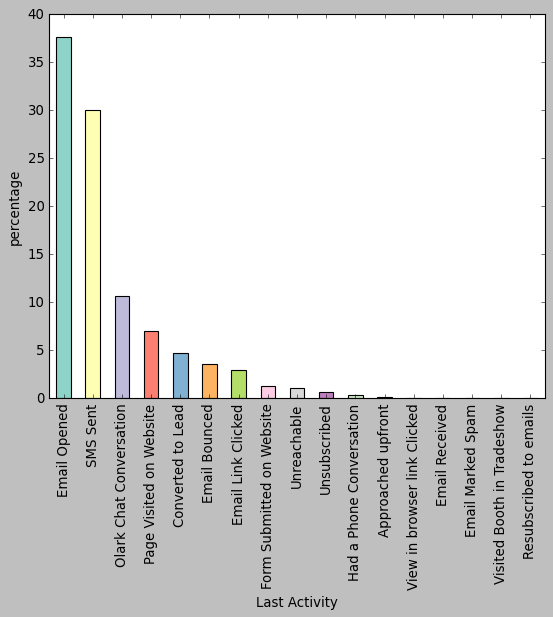

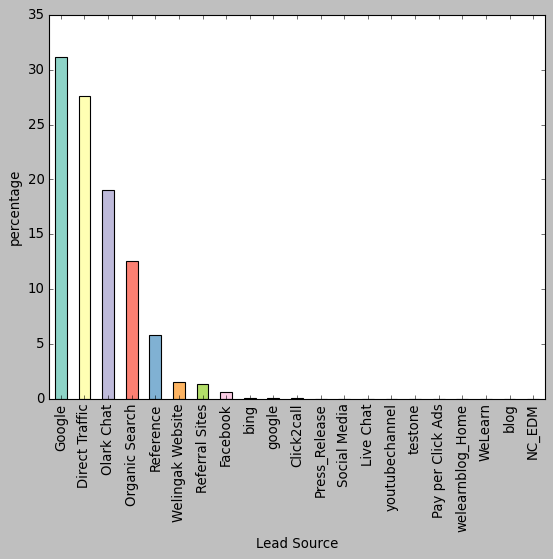

In [36]:
#### TotalVisits,Page Views Per Visit,Last Activity,Lead Source 
list=['Last Activity','Lead Source']
for l in list:
    bar_plot(l)

#### We can see these columns have very less null values we can drop the null value rows

#### For TotalVisits,Page Views Per Visit also we can drop rows

In [37]:
lead_score_df.dropna(inplace=True)

In [38]:
round((lead_score_df.isnull().sum().sort_values(ascending=False)/len(lead_score_df.index)),2)*100

Prospect ID                                 0.0
Newspaper Article                           0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Lead Quality                                0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Magazine                                    0.0
Lead Number                                 0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                    

### All null values are handled

In [39]:
for c in lead_score_df:
    print(lead_score_df[c].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
___________________________________________________
579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: Lead Number, Length: 9074, dtype: int64
___________________________________________________
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
__________________________________________________

#### We can see 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview' only one value is present majorly. so we can drop them

In [40]:
# Deleting the columns which are not significant in our analysis
lead_score_df=lead_score_df.drop(['Prospect ID','Lead Number','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [41]:
# Converting google to Google in Lead Source
lead_score_df['Lead Source']=lead_score_df['Lead Source'].replace(['google'],'Google')

### 3. EDA

### 3.1 Univariate and Bivariate Analysis

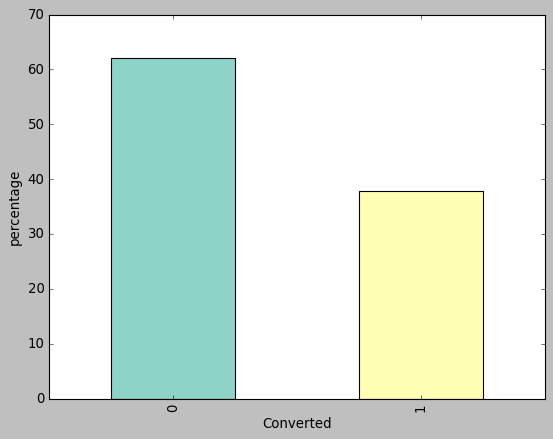

In [42]:
# Target variable
bar_plot('Converted')

In [43]:
(sum(lead_score_df['Converted'])/len(lead_score_df['Converted'].index))*100

37.85541106458012

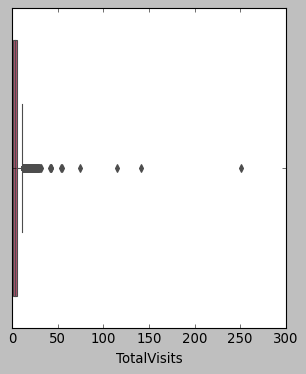

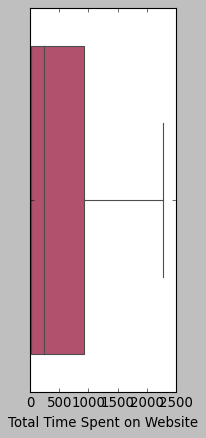

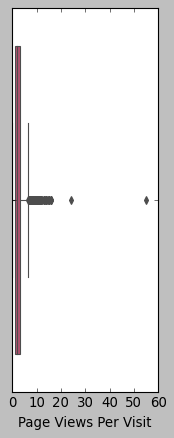

In [44]:
# Performing visualisation on numerical variables for treating outliers
num_list=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15,5))
for num in num_list:
    plt.subplot(1,3,num_list.index(num)+1)
    sns.boxplot(lead_score_df[num],palette='flare')
    plt.show()

In [45]:
#checking for percentiles
lead_score_df[num_list].describe([0.25,0.50,0.75,0.90,0.95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
max,251.000000,2272.000000,55.000000


### We can see there are outliers in the columns 
#### 1. For Total Time spent on the website we can see no outliers 
#### 2. For TotalVisits the difference between quatile of 95% and max is high so we should drop values after 95%
#### 3. For Page View Per Visit also 95% quatile and max is too different so should drop values after 95%

In [46]:
percent_95=lead_score_df['TotalVisits'].quantile(0.95)
lead_score_df=lead_score_df[lead_score_df['TotalVisits']<percent_95]

In [47]:
percent_95=lead_score_df['Page Views Per Visit'].quantile(0.95)
lead_score_df=lead_score_df[lead_score_df['Page Views Per Visit']<percent_95]

In [48]:
#checking for percentiles
lead_score_df[num_list].describe([0.25,0.50,0.75,0.90,0.95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8124.000000,8124.000000,8124.000000
mean,2.581118,460.237198,1.944542
std,2.174566,539.219974,1.527698
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,223.500000,2.000000
75%,4.000000,870.000000,3.000000
90%,5.000000,1353.700000,4.000000
95%,7.000000,1539.700000,5.000000
max,9.000000,2272.000000,5.000000


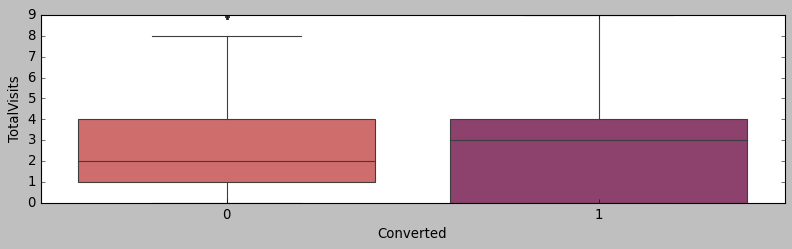

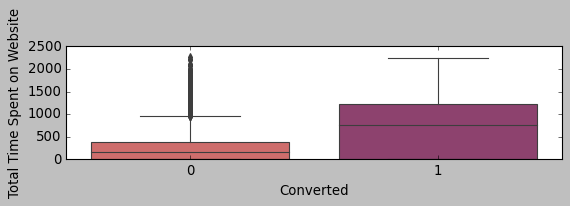

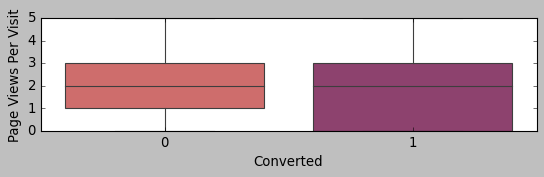

In [49]:
# Analysing numerical variable ith target variable
plt.figure(figsize=(12,10))
for num in num_list:
    plt.subplot(3,1,num_list.index(num)+1)
    sns.boxplot(data=lead_score_df,y=num,x='Converted',palette='flare')
    plt.show()

#### 1. We can see total visit for 0 and 1 are same 
#### 2. People who spent time more on website are likely to be converted.

In [50]:
def plot_categorical(variable):
    plt.style.use('classic')
    sns.despine
    plt.figure(figsize=(20,10))
    ax1=sns.countplot(x=variable,hue='Converted',data=lead_score_df,palette='flare')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    plt.show

In [51]:
cat_list=['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity']

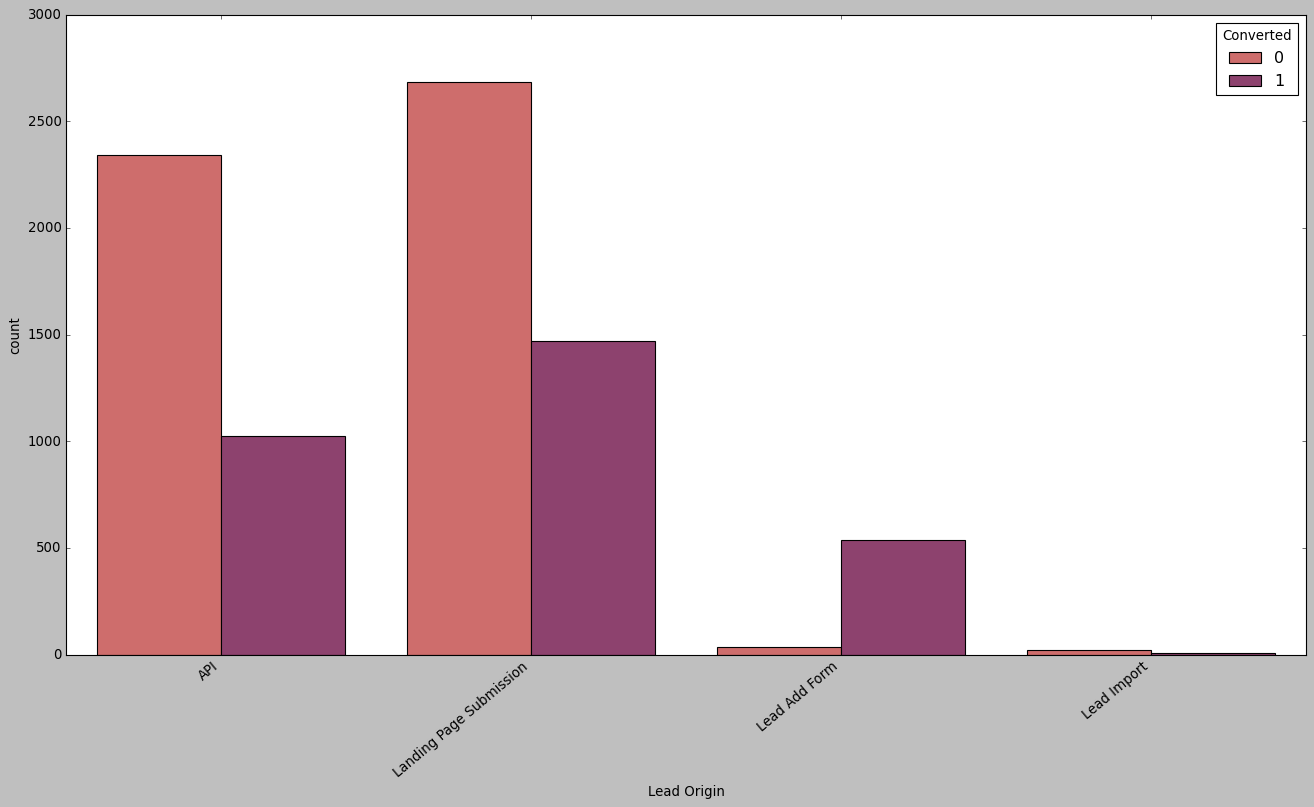

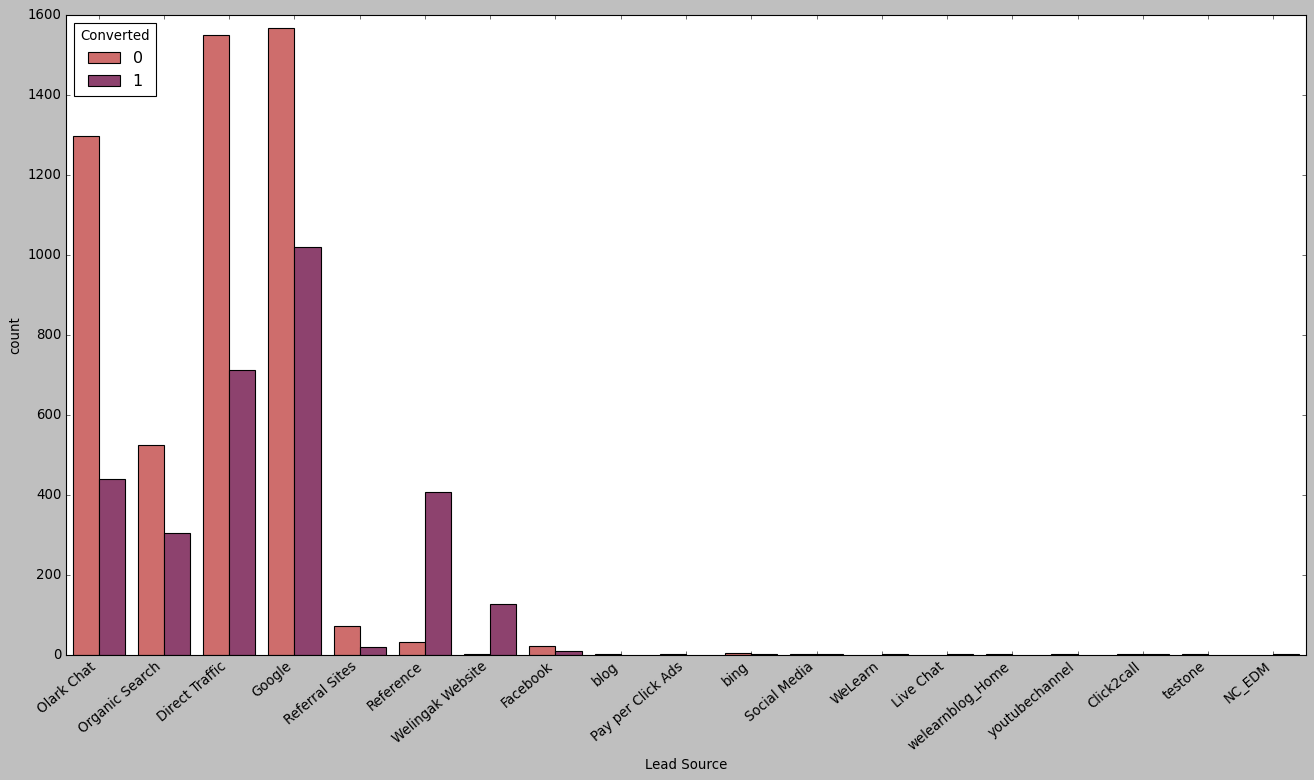

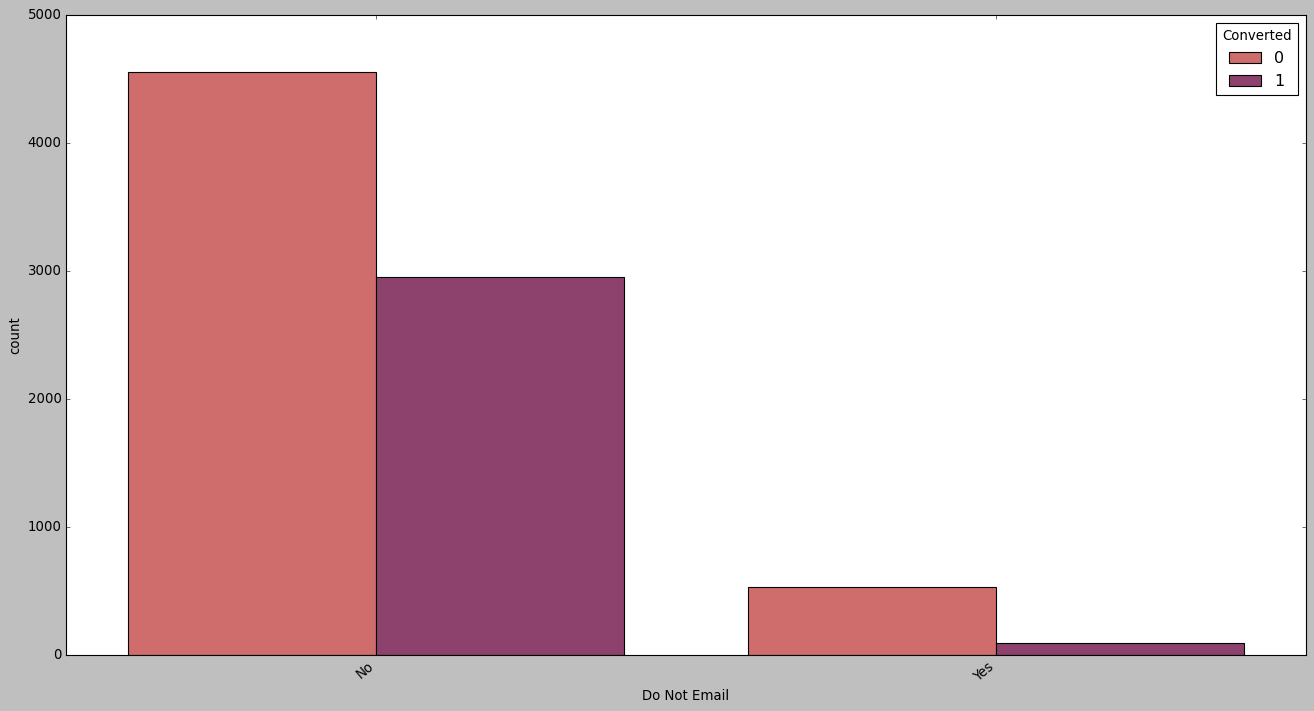

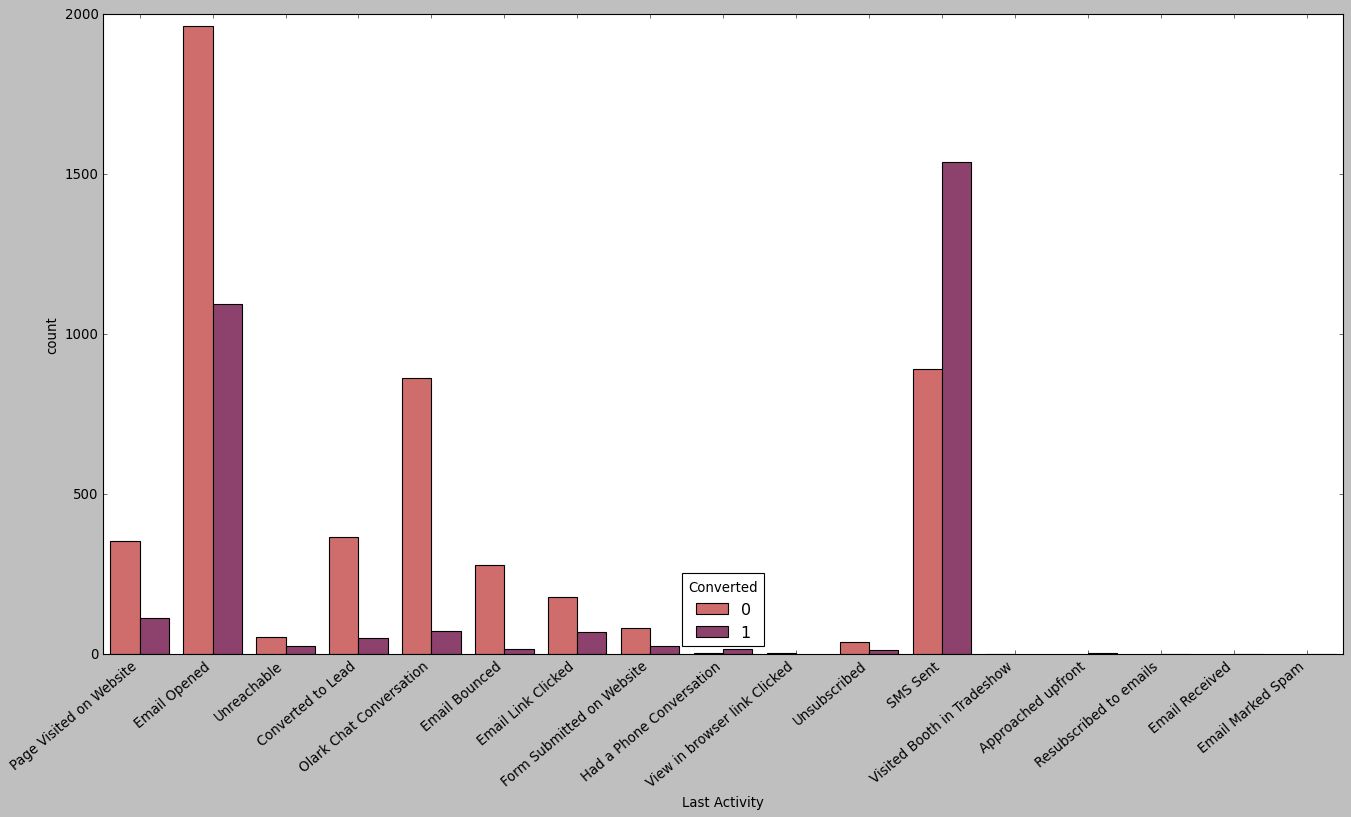

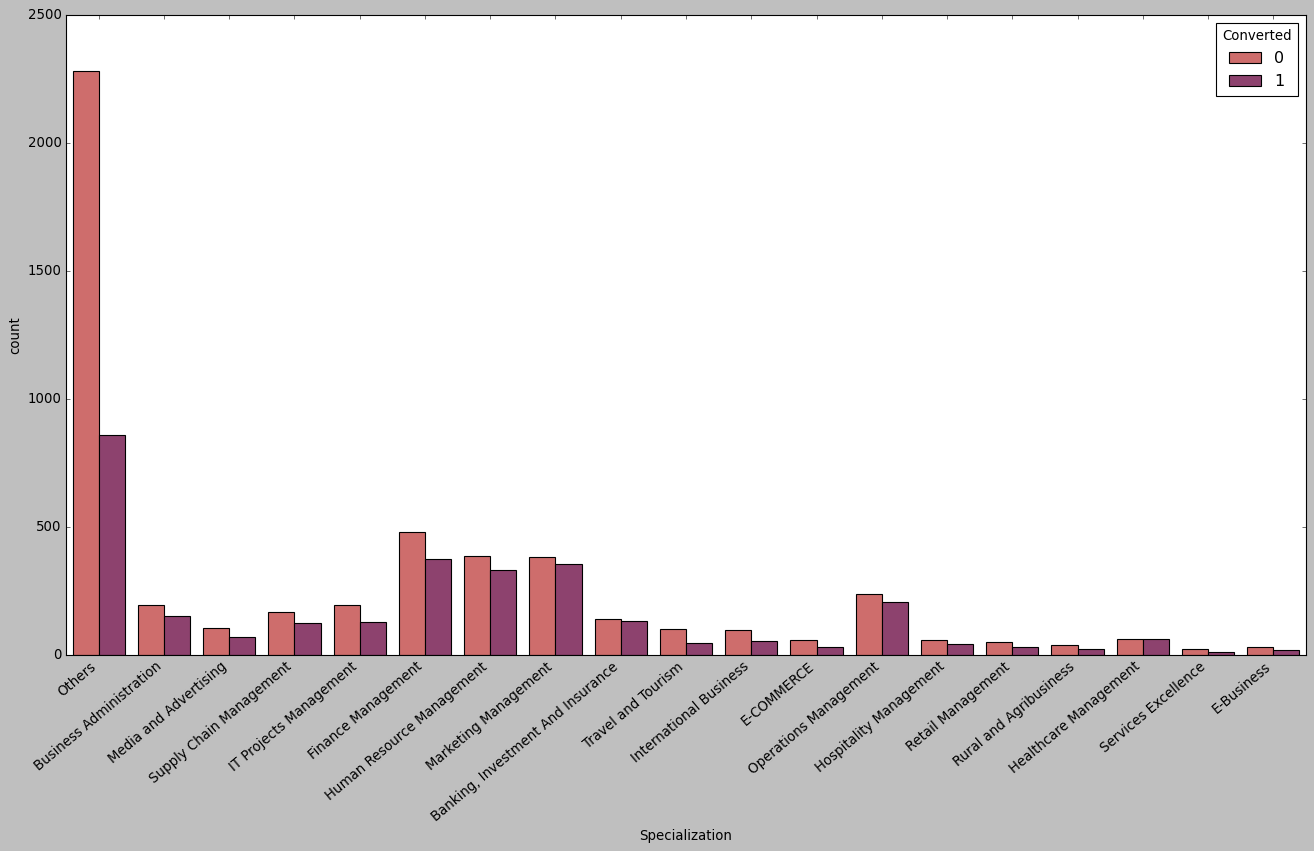

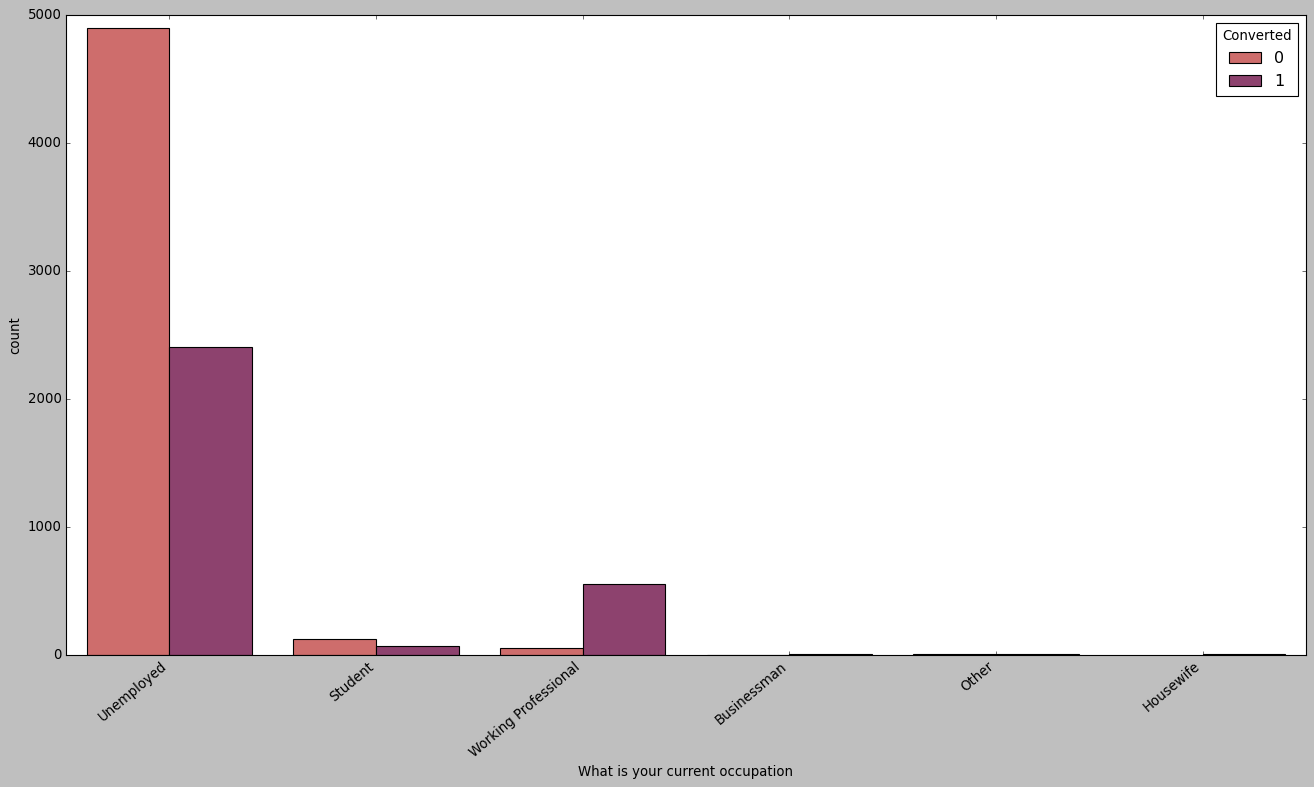

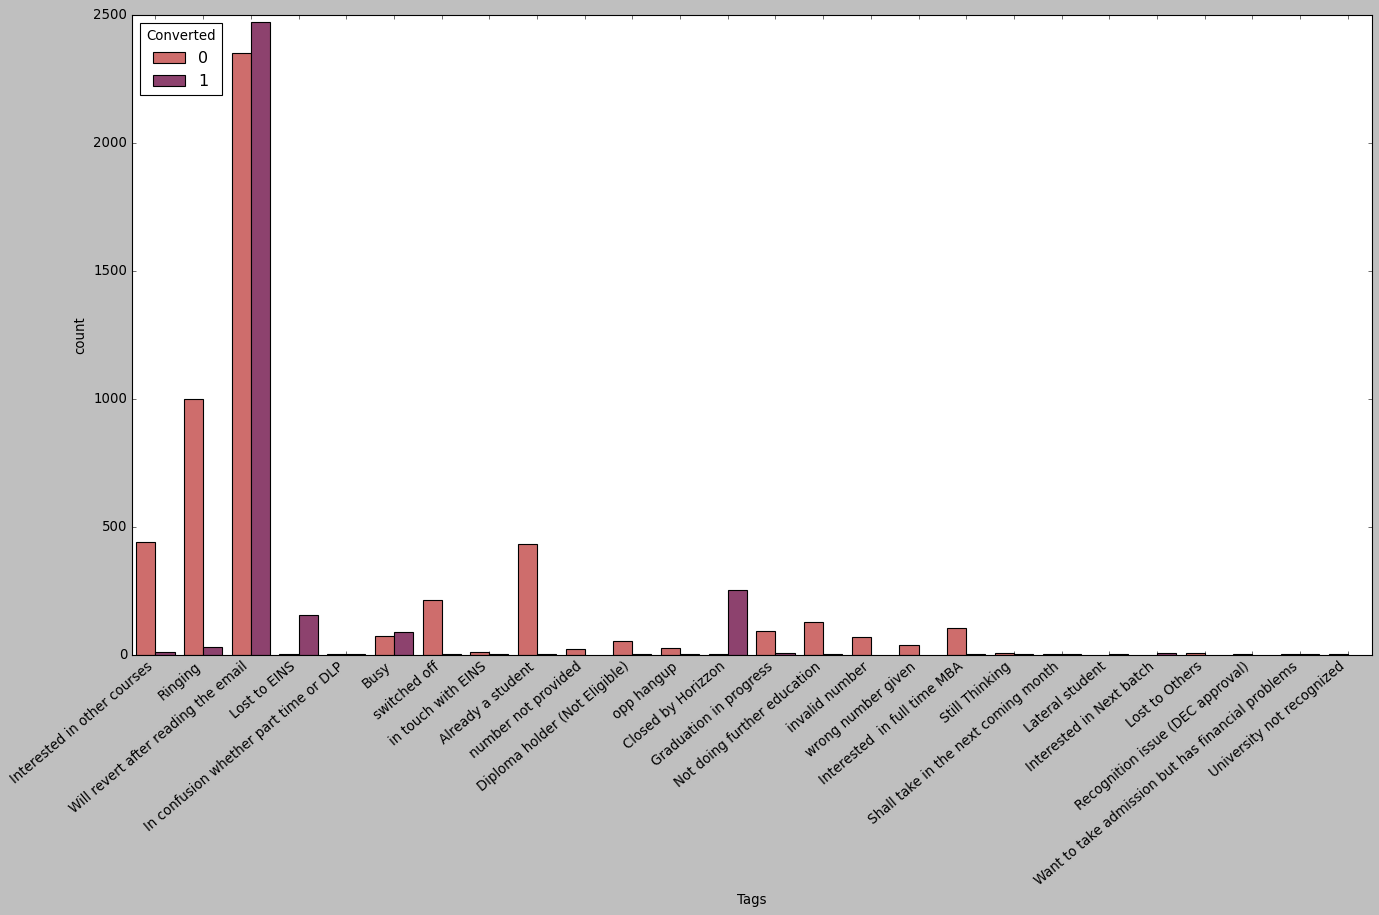

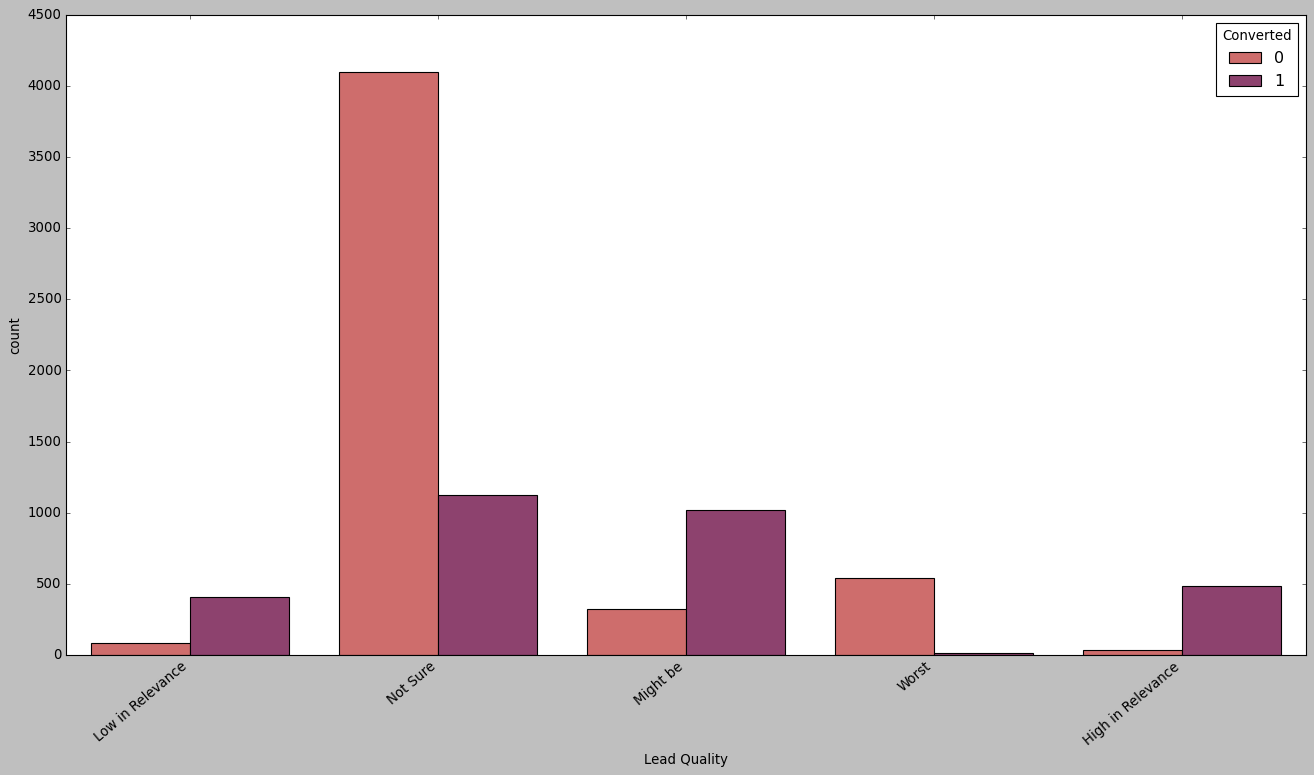

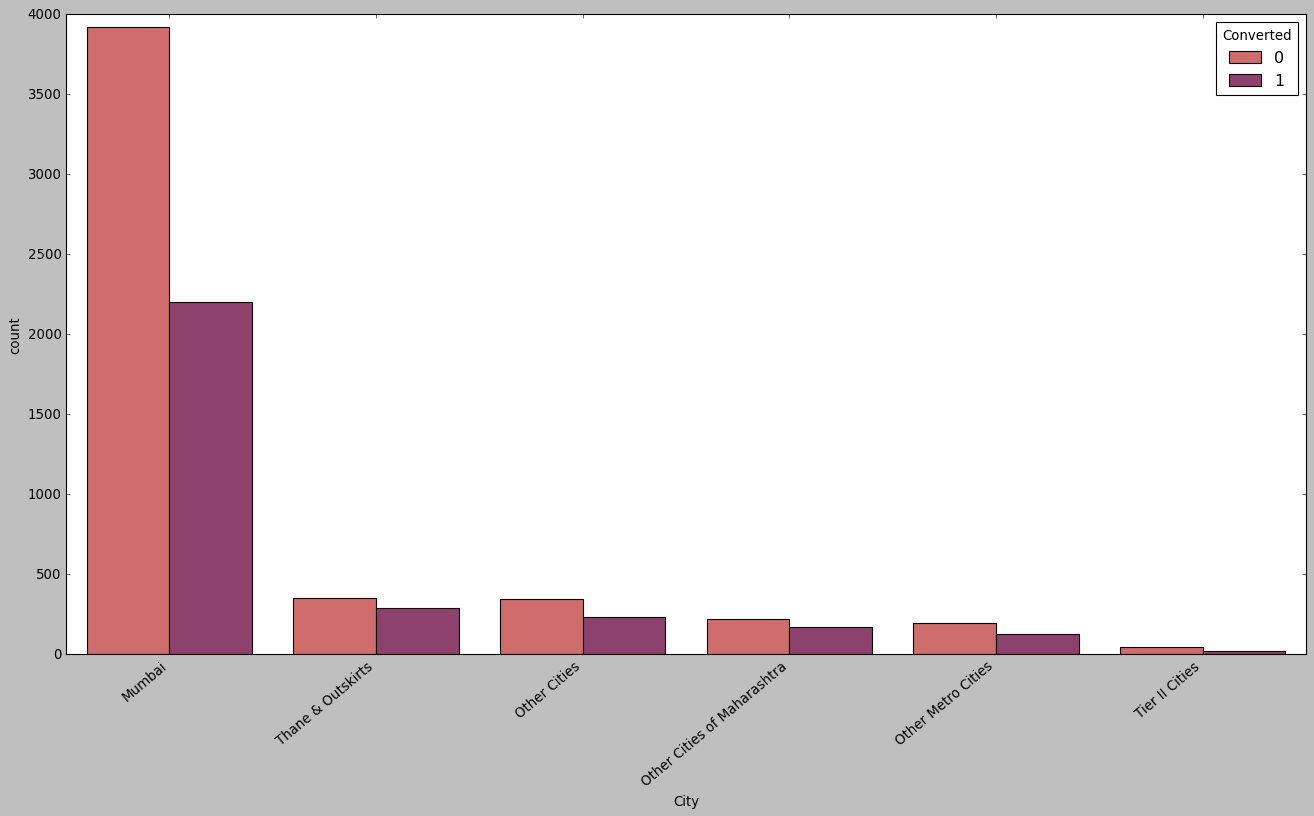

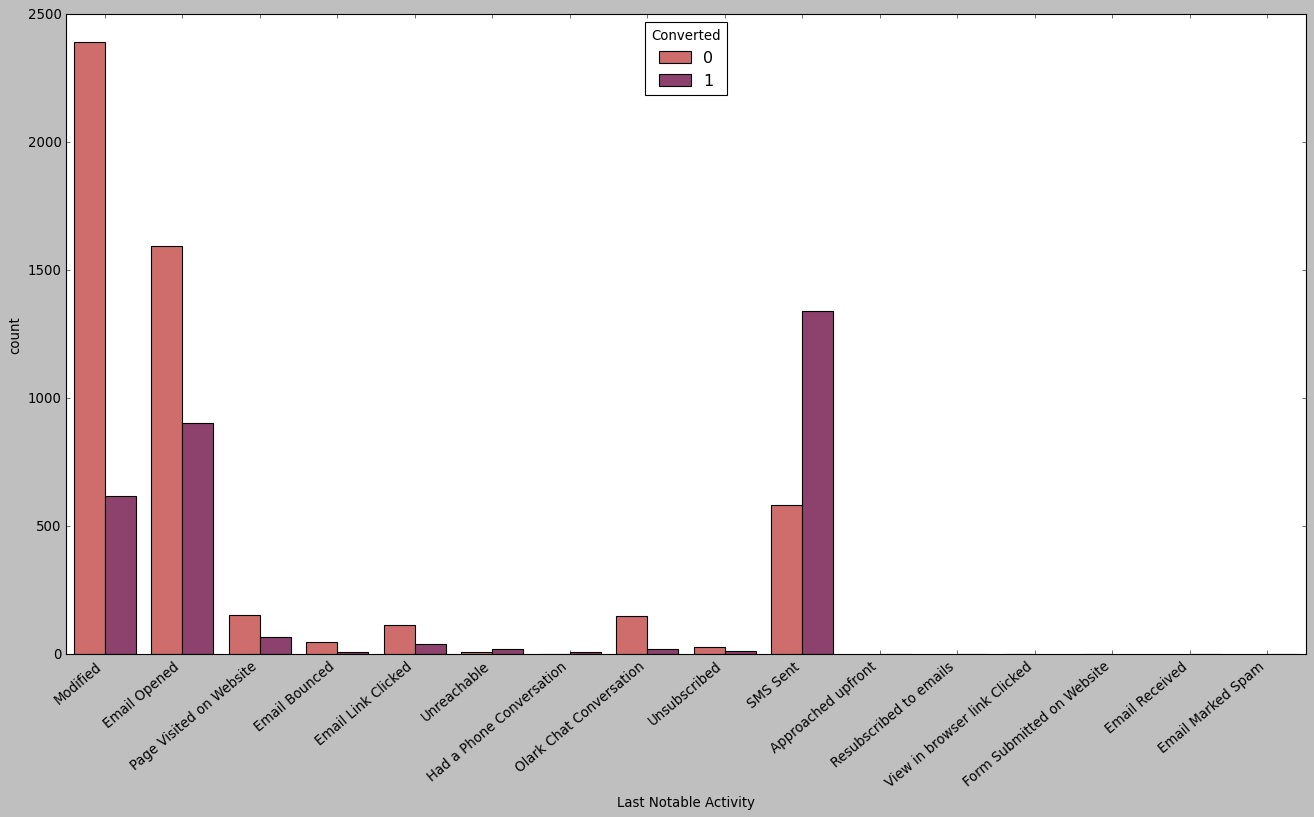

In [52]:
for i in cat_list:
    plot_categorical(i)

### Lead Origin:
#### 1. API and Landing Page Submission have more leads and are converted less
#### 2. Lead Add Form has less leads but conversion rate is more

### Lead Source:
#### 1. Direct traffic and Google generate more leads 
#### 2.Reference and Welingak website leads have more conversion rate

### Do Not Email
#### 1. No responses have most of the leads converted

### Last Activity
#### 1. Email Opened and SMS sent has more leads converted

### Specialization
#### 1. all have similar conversion rates

### What is your current occupation
#### 1. Unemployed has more leads 
#### 2. Working proffesionals has more conversion rate

### Tags
#### 1. Will revert after reading the emails has more conversion rate and more leads

### Lead Quality
#### 1. mightbe has the highest conversion rate and worst has lowest

### City
#### 1. Mumbai has highest conversion rate

In [53]:
lead_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      8124 non-null   object 
 1   Lead Source                      8124 non-null   object 
 2   Do Not Email                     8124 non-null   object 
 3   Converted                        8124 non-null   int64  
 4   TotalVisits                      8124 non-null   float64
 5   Total Time Spent on Website      8124 non-null   int64  
 6   Page Views Per Visit             8124 non-null   float64
 7   Last Activity                    8124 non-null   object 
 8   Specialization                   8124 non-null   object 
 9   What is your current occupation  8124 non-null   object 
 10  Tags                             8124 non-null   object 
 11  Lead Quality                     8124 non-null   object 
 12  City                

### 4. Data Preparation

#### 4.1 Converting values to binary

In [54]:
lead_score_df['Do Not Email']=lead_score_df['Do Not Email'].map({'Yes':1,'No':0})

### 4.2 Dummy variable creation

In [55]:
cat_list=['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation','Tags','City',
       'Lead Quality', 'Last Notable Activity']

In [56]:
# create dummy variables and drop the first
dummy=pd.get_dummies(lead_score_df[cat_list],drop_first=True)

In [57]:
# Adding the results to the master dataframe
lead_score_df=pd.concat([lead_score_df,dummy],axis=1)

In [58]:
# we created dummy so we can drop original
lead_score_df=lead_score_df.drop(cat_list,1)

In [59]:
lead_score_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 5. Test Train split

In [60]:
#Putting feature variable
x=lead_score_df.drop(['Converted'],axis=1)
x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [61]:
y=lead_score_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the datainto train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

### 6. Feature Scaling

In [63]:
scaler=StandardScaler()

In [64]:
num_list

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [65]:
x_train[num_list]=scaler.fit_transform(x_train[num_list])
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3994,0,-0.723054,0.921363,-0.615309,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
897,0,1.145076,-0.244296,-0.174197,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4030,0,0.678043,1.617057,1.359821,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4530,0,0.678043,-0.767918,1.359821,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1452,0,1.612108,-0.253548,0.701445,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Checking the converson rate
(sum(lead_score_df['Converted'])/len(lead_score_df['Converted'].index))*100

37.456917774495324

We have almost 37.5%% conversion rate

### 7. Logistic Regression
### 7.1 Building a model


In [67]:
logreg=LogisticRegression()

In [68]:
# function for building a model to avoid repeation of code
def model_building(x_train,y_train):
    x_train_sm=sm.add_constant(x_train)
    logm=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial()).fit()
    print(logm.summary())
    return x_train_sm,logm

In [69]:
# function for VIF values
def checking_VIF(x_train):
    x=x_train.drop('const',1)
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [70]:
# function for confusion matrix
def confusion_matrix(conv,pred):
    confusion=metrics.confusion_matrix(conv,pred)
    print('confusion matrix:',confusion)
    print('Metrics acurracy_score:',metrics.accuracy_score(conv,pred))
    return confusion

In [71]:
# function for calculating other metrics
def cal_metrics(confusion):
    TP=confusion[1,1]
    TN=confusion[0,0]
    FP=confusion[0,1]
    FN=confusion[1,0]
    print('Sensitivity:',TP/float(TP+FN))
    print('specificity:',TN/float(TN+FP))
    print("false positive rate:",FP/ float(TN+FP))
    print('negative predictive value:',TN/float(TN+FN))


In [72]:
# building first model
x_sm,logm=model_building(x_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5577
Model Family:                Binomial   Df Model:                          108
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1127.4
Date:                Tue, 18 Jul 2023   Deviance:                       2254.7
Time:                        14:06:21   Pearson chi2:                 3.17e+04
No. Iterations:                    25   Pseudo R-squ. (CS):             0.6062
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

## 7.2 Feature  Selection using RFE

In [73]:
rfe =RFE(estimator=logreg,n_features_to_select=15) 
rfe=rfe.fit(x_train,y_train)

In [74]:
rfe.support_

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False])

In [75]:
#list(zip(x_train.columns, rfe.support_, rfe.ranking_))

In [76]:
col = x_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [77]:
x_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visit

### Building model 2

In [78]:
x_sm2,logm2=model_building(x_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5670
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1396.2
Date:                Tue, 18 Jul 2023   Deviance:                       2792.3
Time:                        14:06:30   Pearson chi2:                 1.98e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5671
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Tags_invalid number has p value > 0.05 we can drop it

In [79]:
col_2=col.drop('Tags_invalid number',1)

#### Building model 3

In [80]:
# Rebuilding a model 3
x_sm3,logm3=model_building(x_train[col_2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5671
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1400.5
Date:                Tue, 18 Jul 2023   Deviance:                       2801.0
Time:                        14:06:31   Pearson chi2:                 2.00e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5664
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Tags_switched off has pvalue >0.05 so we can drop it

In [81]:
col_3=col_2.drop('Tags_switched off',1)

#### Building model 4

In [82]:
# Rebuilding a model 4
x_sm4,logm4=model_building(x_train[col_3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5672
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.7
Date:                Tue, 18 Jul 2023   Deviance:                       2831.5
Time:                        14:06:31   Pearson chi2:                 2.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5641
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### All features have p value less than 0.05 and all seem significant

### 7.3 Checking VIF to see if multicollinearity exists

In [83]:
checking_VIF(x_sm4)

,Features,VIF
9,Lead Quality_Not Sure,2.73
8,Tags_Will revert after reading the email,2.58
1,Lead Origin_Lead Add Form,1.61
7,Tags_Ringing,1.47
11,Last Notable Activity_SMS Sent,1.47
2,Lead Source_Welingak Website,1.33
3,Last Activity_Olark Chat Conversation,1.23
0,Do Not Email,1.18
5,Tags_Closed by Horizzon,1.15
4,Tags_Busy,1.11


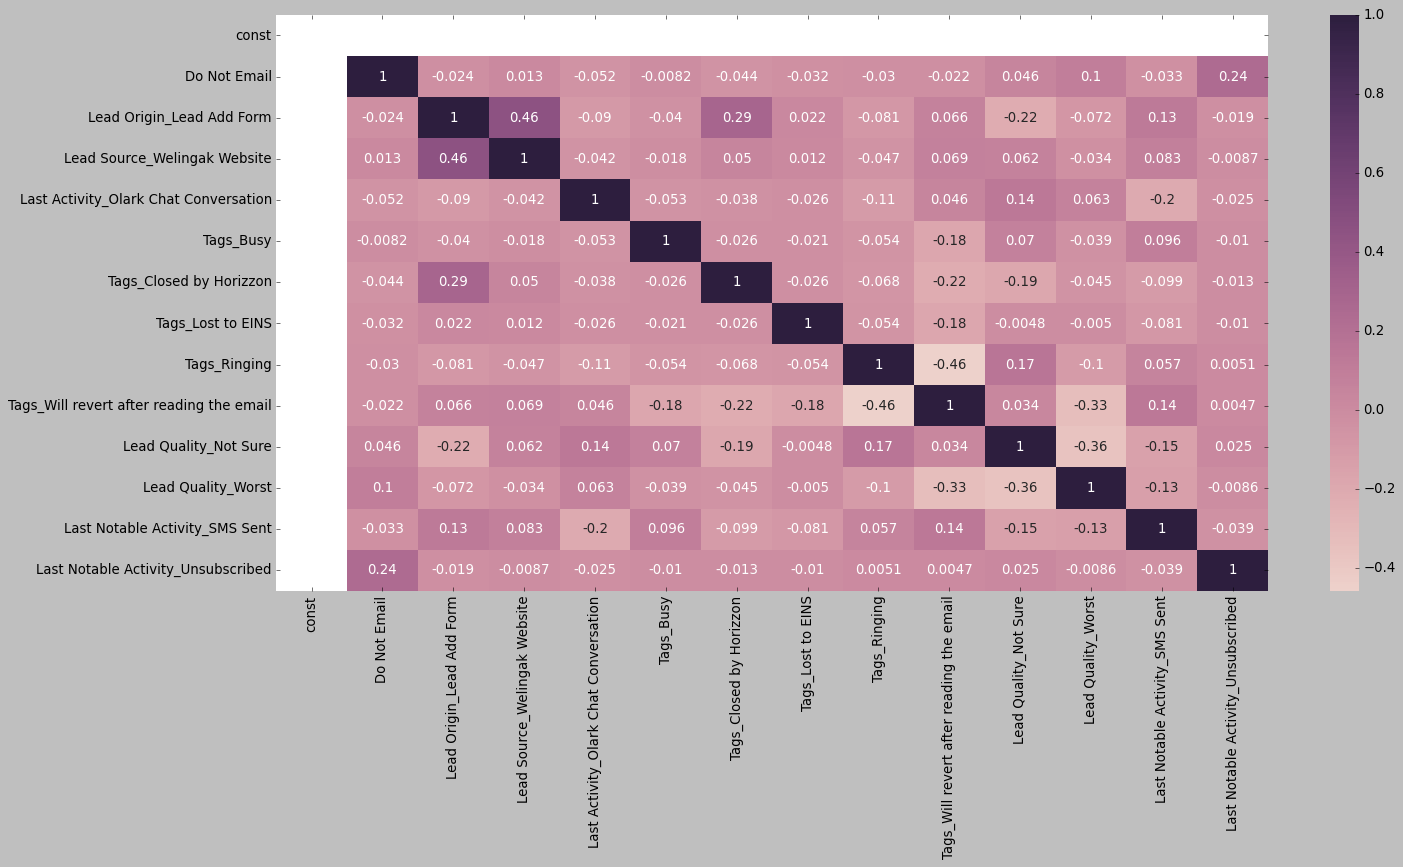

In [84]:
#plotting correlations
plt.figure(figsize=(20,9))
sns.heatmap(x_sm4.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

### We can say that there is not much multicolinearity and all variables have god VIF

In [85]:
# Get predicted values
y_train_pred=logm4.predict(x_sm4)
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([8.89037251e-02, 2.20104684e-01, 8.99887697e-01, 1.37500991e-03,
       2.23076404e-01, 3.05435337e-03, 2.96084423e-04, 7.56457949e-01,
       2.20104684e-01, 6.35031029e-02])

In [86]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Conversion_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_prob
0,0,0.088904
1,0,0.220105
2,1,0.899888
3,0,0.001375
4,0,0.223076


#### creating new column for predicted as 1 for prob>0.5 else 0

In [87]:
y_train_pred_final['Predicted_final']=y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>0.5 else 0)

In [88]:
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted_final
0,0,0.088904,0
1,0,0.220105,0
2,1,0.899888,1
3,0,0.001375,0
4,0,0.223076,0


In [89]:
# confusion matrix
confusion=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted_final)

confusion matrix: [[3371  153]
 [ 327 1835]]
Metrics acurracy_score: 0.9155821315511783


### we can say this our final model is
#### 1.metrics accuracy score is 92%

### 7.4 Metrics beyond simple accuracy

In [90]:
cal_metrics(confusion)

Sensitivity: 0.8487511563367253
specificity: 0.956583427922815
false positive rate: 0.043416572077185016
negative predictive value: 0.9115738236884803


### 7.5 Plotting ROC Curve

In [91]:
def Plot_ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob,drop_intermediate=False)

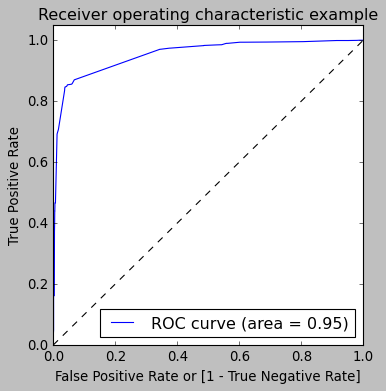

In [93]:
Plot_ROC(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

### 7.6 Finding optimal cut off

In [94]:
# creating columns with different cutoff probabilities
num=[float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]=y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>i else 0)

In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380232  1.000000  0.000000
0.1   0.1  0.774534  0.970398  0.654370
0.2   0.2  0.775413  0.970398  0.655789
0.3   0.3  0.907844  0.857539  0.938706
0.4   0.4  0.915934  0.853839  0.954030
0.5   0.5  0.915582  0.848751  0.956583
0.6   0.6  0.917868  0.845513  0.962259
0.7   0.7  0.914703  0.835338  0.963394
0.8   0.8  0.875132  0.691952  0.987514
0.9   0.9  0.792649  0.466235  0.992906


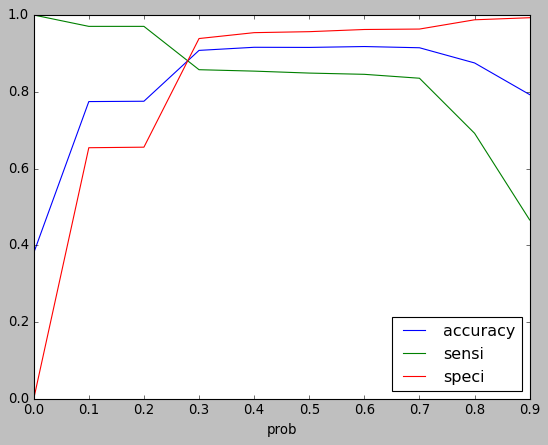

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### 0.25 is the optimal point cutoff probability

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,Predicted_final,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.088904,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.220105,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.899888,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.001375,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.223076,0,1,1,1,0,0,0,0,0,0,0,0


In [98]:
#confusion metrics and accuray
confusion_2=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

confusion matrix: [[3308  216]
 [ 308 1854]]
Metrics acurracy_score: 0.9078438269433696


In [99]:
# plotting confusion matrix
from mlxtend.plotting import plot_confusion_matrix

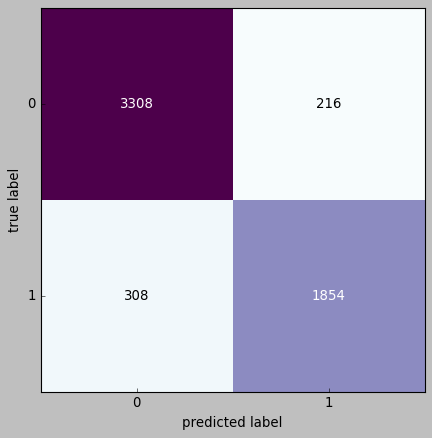

In [100]:
fig,ax1=plot_confusion_matrix(conf_mat=confusion_2,cmap='BuPu')
plt.show()

In [101]:
# Calculating metrics
cal_metrics(confusion_2)

Sensitivity: 0.8575393154486587
specificity: 0.9387060158910329
false positive rate: 0.06129398410896708
negative predictive value: 0.9148230088495575


In [102]:
# Classification
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_train_pred_final.Converted,y_train_pred_final.Predicted_final))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3524
           1       0.92      0.85      0.88      2162

    accuracy                           0.92      5686
   macro avg       0.92      0.90      0.91      5686
weighted avg       0.92      0.92      0.91      5686



### 7.7 Precision and Recall

Precision=TP/TP+FP

In [104]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9230382293762576

Recall=TP/TP+FN

In [105]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8487511563367253

In [106]:
# Using SKlearn Precison
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)

0.9230382293762576

In [107]:
# Using SKlearn Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)

0.8487511563367253

### Precision and recall tradeoff

In [108]:
#importing library
from sklearn.metrics import precision_recall_curve

In [109]:
y_train_pred_final.Converted, y_train_pred_final.Predicted_final

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5681    0
 5682    0
 5683    0
 5684    1
 5685    0
 Name: Converted, Length: 5686, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5681    0
 5682    0
 5683    0
 5684    1
 5685    0
 Name: Predicted_final, Length: 5686, dtype: int64)

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

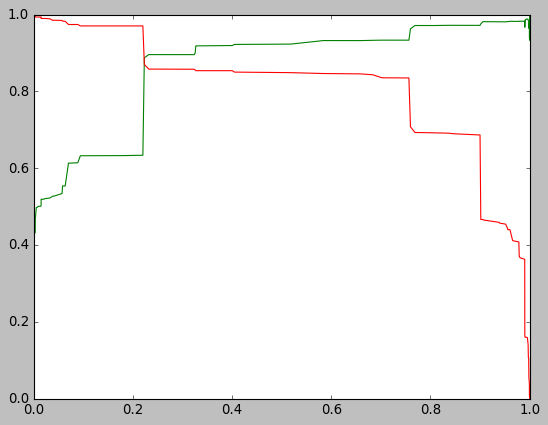

In [111]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### We can say 0.2 is the optimal point for cutoff probability using precision and recall

### 8. Making predictions on test data

In [112]:
x_test[num_list]=scaler.transform(x_test[num_list])
x_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3117,0,-1.190087,-0.856730,-1.273686,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5735,0,1.145076,-0.481129,2.018198,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3135,0,-0.256022,-0.264649,0.043068,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1663,0,-1.190087,-0.856730,-1.273686,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3386,0,3.013206,-0.268350,0.701445,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
x_test_sm=x_test[col_3]

In [114]:
x_test_sm=sm.add_constant(x_test_sm)

In [115]:
# making predictions
y_test_pred=logm4.predict(x_test_sm)
y_test_pred[:10]

3117    0.063503
5735    0.003560
3135    0.220105
1663    0.951473
3386    0.220105
3936    0.960152
4729    0.003054
2213    0.001375
3167    0.220105
4668    0.220105
dtype: float64

In [116]:
#converting to dataframe array
y_test_pred_1=pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
3117,0.063503
5735,0.003560
3135,0.220105
1663,0.951473
3386,0.220105


In [117]:
#ytest to dataframe
y_test_df=pd.DataFrame(y_test)

In [118]:
# Putting Lead Id to index
y_test_df['Lead ID'] = y_test_df.index

In [119]:
# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [120]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [121]:
y_pred_final.head()

,Converted,Lead ID,0
0,0,3117,0.063503
1,0,5735,0.003560
2,0,3135,0.220105
3,1,1663,0.951473
4,0,3386,0.220105


In [122]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})

In [123]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Conversion_prob'], axis=1)

In [124]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Conversion_prob
0,3117,0,0.063503
1,5735,0,0.003560
2,3135,0,0.220105
3,1663,1,0.951473
4,3386,0,0.220105


In [125]:
y_pred_final['Predicted_final'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.42 else 0)

In [126]:
y_pred_final.head()

,Lead ID,Converted,Conversion_prob,Predicted_final
0,3117,0,0.063503,0
1,5735,0,0.003560,0
2,3135,0,0.220105,0
3,1663,1,0.951473,1
4,3386,0,0.220105,0


In [127]:
#confusion matrix and accuracy
confusion_test=confusion_matrix(y_pred_final.Converted,y_pred_final.Predicted_final)

confusion matrix: [[1494   63]
 [ 134  747]]
Metrics acurracy_score: 0.9191960623461854


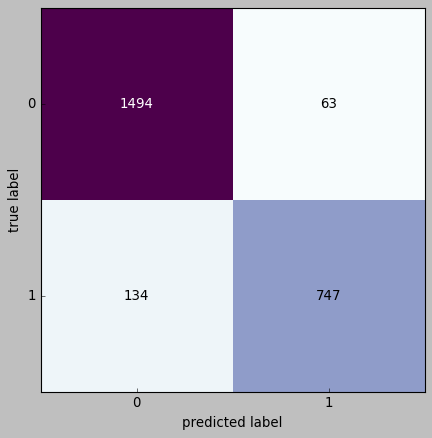

In [128]:
fig,ax1=plot_confusion_matrix(conf_mat=confusion_test,cmap='BuPu')
plt.show()

In [129]:
# Calculating metrics
cal_metrics(confusion_test)

Sensitivity: 0.8479001135073779
specificity: 0.9595375722543352
false positive rate: 0.04046242774566474
negative predictive value: 0.9176904176904177


In [130]:
print(classification_report(y_pred_final.Converted,y_pred_final.Predicted_final))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1557
           1       0.92      0.85      0.88       881

    accuracy                           0.92      2438
   macro avg       0.92      0.90      0.91      2438
weighted avg       0.92      0.92      0.92      2438



In [131]:
# Precision 
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.9222222222222223

In [132]:
#Recall
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.8479001135073779

### 9. Assigning leads

In [133]:
y_pred_final['Lead_score']=y_pred_final.Conversion_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Lead ID,Converted,Conversion_prob,Predicted_final,Lead_score
0,3117,0,0.063503,0,6
1,5735,0,0.003560,0,0
2,3135,0,0.220105,0,22
3,1663,1,0.951473,1,95
4,3386,0,0.220105,0,22


### Conclusions:

#### Train Data:
1. Accuracy:91.5%
2. Sensitivity:84.8%
3. Specificity:95.6%

#### Test Data:
1. Accuracy:91.9%
2. Sensitivity:84.7%
3. Specificity:95.9%

#### lead that should be contacted


In [134]:
hot_leads=y_pred_final.loc[y_pred_final['Lead_score']>=85]

In [135]:
hot_leads

,Lead ID,Converted,Conversion_prob,Predicted_final,Lead_score
3,1663,1,0.951473,1,95
5,3936,1,0.960152,1,96
10,4782,1,0.997972,1,100
13,9022,1,0.899888,1,90
15,8841,1,0.899888,1,90
...,...,...,...,...,...
2406,1714,1,0.955115,1,96
2414,6582,1,0.989993,1,99
2424,4158,1,0.899888,1,90
2425,4140,1,0.989993,1,99


### We have 623 leads which can be caontact as they have high chances of conversion rate

### Important features from our final model

In [136]:
logm4.params.sort_values(ascending=False)

Tags_Lost to EINS                           8.970135
Tags_Closed by Horizzon                     8.071577
Tags_Busy                                   4.540301
Tags_Will revert after reading the email    4.523072
Lead Source_Welingak Website                2.636515
Last Notable Activity_SMS Sent              2.398414
Last Notable Activity_Unsubscribed          2.063910
Lead Origin_Lead Add Form                   1.604442
Tags_Ringing                               -0.799790
Last Activity_Olark Chat Conversation      -1.426001
Do Not Email                               -1.536651
const                                      -2.327095
Lead Quality_Worst                         -3.307332
Lead Quality_Not Sure                      -3.461034
dtype: float64